# Smarter Sustainable Tourism: **Building** & **Pre-processing** a High-Quality Dataset for the Future of Tourism Analytics in Saudi Arabia

Tourism plays a vital role in driving economic growth and cultural exchange. In Saudi Arabia, with its diverse landscapes and rich cultural heritage, identifying and enhancing tourist experiences is a key objective. However, a lack of centralized, comprehensive datasets on tourist destinations and their sentiment-related insights creates challenges in understanding visitor preferences and satisfaction.

Our **goal** of this project is to create a detailed & pre-processe, high-quality dataset combining geographical, thematic, and sentiment analysis for tourist destinations in Saudi Arabia. This dataset will support building recommendation systems, analyzing tourism trends, and providing actionable insights for businesses and stakeholders in the tourism industry.

**Roadmap**

*   Reviewing papers to Identifying Important Features
*   Webscraping
*   Megring Datasets
*   Add sentiment analysis feature
*   Remove duplicated names
*   Column Standardization
*   Remove Unrelated places if exist
*   Trasnalting
*   Visulization:
      1.   Steps to Facilitate the visulization
          *   Reduce Number of Themes
          *   Remove repeated places
      2.   Visulizing The dataset
      3. Finding Insights
* Create and Evalute a model









***Background***

We explored various tourism
analytics methodologies, with a focus on **recommendation systems**, **sentiment analysis**, **persona analysis**,**market trends**, and **geolocation analysis**.
Through a review of existing literature, we have
identified key features essential to each of these
areas, which guided the development of our
framework. The following subsections summarize
the most relevant findings from the literature

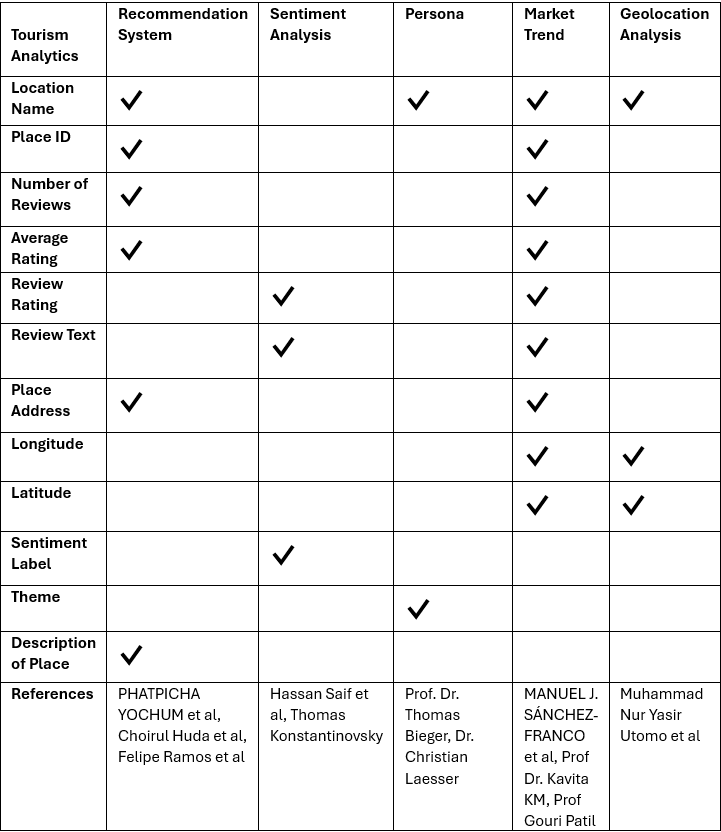


## Data Collection and WebScraping

The dataset used in this project is a comprehensive
collection of tourism-related information for Saudi
Arabia, sourced from **[TripAdvisor](tripadvisor.com)** and **[Google Maps](https://www.google.com/maps)** both are megrged with two datasets from Kaggle, the 1st about **[Entertainment destinations and KSA](https://www.kaggle.com/datasets/anas123siddiqui/entertainment-in-saudi-arabia)** and the 2nd abou **[cafe shops in Riyadh](https://www.kaggle.com/datasets/riybot/riyadh-cafes)**.

It includes details about various tourist destinations, such as their **Names**, **placeRating**, **description**, **addresses**, geographical coordinates
(**longitude** and **latitude**), **webURLs**, and **websites**.
Additionally, the dataset contains user-generated
**reviews** along with **textRatings**, which are critical
for understanding the sentiment of visitors towards
these destinations.

# Importing DataSets as a pandas DataFrames

In [1]:
import pandas as pd
# datasets from google maps
restaurant_df= pd.read_csv('/content/restaurants.csv')
salon_df = pd.read_csv('/content/salons.csv')

# dataset Entertainment_KSA from kaggle
Entertainment_KSA = pd.read_csv('/content/Entertainment_KSA.csv')

# dataset from tripadvisor
tripadvisor = pd.read_csv('/content/C__Users_dema__Downloads_df1_filled_with_duplicates.csv')

# dataset about cafes from kaggle
cafes  = pd.read_csv('/content/riyadh_cafes.csv')

# cafes.tail(5)

# Combine 4 Datasets
Here we are merging the 4 Datasets
1. using the function '**Concat**'
2. axis=0
We used concat because we wanted to merge the datasets under each other, and some datasets contained columns that were not present in the other dataset, for example: Only trip advisor provide featrure placeID.

In [2]:
combined_rest_salon = pd.concat([restaurant_df, salon_df], ignore_index=True)
combined_rest_salon_cafes = pd.concat([cafes, combined_rest_salon,], ignore_index=True)
combined_rest_salon_cafes_tripadvisor = pd.concat([tripadvisor, combined_rest_salon_cafes,], ignore_index=True)
combined_df = pd.concat([Entertainment_KSA, combined_rest_salon_cafes_tripadvisor,], ignore_index=True)

combined_df.tail()

,placeInfo/name,placeInfo/rating,theme,placeInfo/address,placeInfo/latitude,placeInfo/longitude,placeInfo/webUrl,rating,text,placeInfo/numberOfReviews,lang,placeInfo/id,placeInfo/website,city,imageUrl
33738,Al Khulb Park and Restaurant,4.1,Holiday park,Unnamed Road Saudi Arabia,20.172945,41.270588,https://www.google.com/maps/search/?api=1&quer...,4.0,NaN,3186,NaN,ChIJr7aCfKTK6BURDWNdULRkvHo,NaN,NaN,https://lh5.googleusercontent.com/p/AF1QipOExI...
33739,Abha Crown Hotel,3.4,Hotel,"حي، طريق الجامعة, Mansak، 6HM4+FF6، إشارة المن...",18.233687,42.556188,https://www.google.com/maps/search/?api=1&quer...,5.0,NaN,1246,NaN,ChIJbz_qhimr_BURg64bp0tA3O0,NaN,Abha,https://lh5.googleusercontent.com/FfpeEdjCAZR6...
33740,Abha Palace Hotel,3.9,Hotel,"Abha Al Jadidah، 6497 - حي - 3731, Abha 62512,...",18.210219,42.483097,https://www.google.com/maps/search/?api=1&quer...,5.0,NaN,6067,NaN,ChIJddoowolU4xUR3iNVr0mS0mw,NaN,Abha,https://dynamic-media-cdn.tripadvisor.com/medi...
33741,Raghdan tourist complex,3.6,Hotel,"King Abdulaziz Road, Al Bahah Saudi Arabia",20.043837,41.447424,https://www.google.com/maps/search/?api=1&quer...,1.0,NaN,1354,NaN,ChIJpaVlPwRG7xUReHGeF-lLPCY,NaN,Al Bahah,https://lh5.googleusercontent.com/p/AF1QipMiBD...
33742,ZIMA,4.2,Nail salon,"Cenomi Haifaa Mall, Palestine, Al-Ruwais, Shop...",21.528120,39.178067,https://www.google.com/maps/search/?api=1&quer...,5.0,NaN,173,NaN,ChIJV2QdoxjPwxURcVxk4n96OB8,NaN,Jeddah,https://lh5.googleusercontent.com/p/AF1QipMDRX...


## adding descriptions

In [3]:
import pandas as pd

descriptions = pd.read_csv('/content/descriptions.csv', encoding='ISO-8859-1')

combined_df = combined_df.merge(
    descriptions[['placeInfo/name', 'description']],
    on='placeInfo/name',
    how='left'
)
combined_df.to_csv('updated_combined_df_updated.csv', index=False)

In [4]:
#final combined dataset
print("\nFinal Combined Dataset:")
combined_df.tail(1)


Final Combined Dataset:


,placeInfo/name,placeInfo/rating,theme,placeInfo/address,placeInfo/latitude,placeInfo/longitude,placeInfo/webUrl,rating,text,placeInfo/numberOfReviews,lang,placeInfo/id,placeInfo/website,city,imageUrl,description
33742,ZIMA,4.2,Nail salon,"Cenomi Haifaa Mall, Palestine, Al-Ruwais, Shop...",21.52812,39.178067,https://www.google.com/maps/search/?api=1&quer...,5.0,NaN,173,NaN,ChIJV2QdoxjPwxURcVxk4n96OB8,NaN,Jeddah,https://lh5.googleusercontent.com/p/AF1QipMDRX...,NaN


# Add sentiment analysis feature

In this step we added a new feature based on another one. This feature is the text_sentiment it lable the reviews(negative, positive or neutral) based on their rating



1.   Created *assign_sentiment*  **function**
2.   This function contains **if_statemnt** that checks the rating and based on it it returns the values of the text_sentiment wheter it is positive, neutral or negative
3.   create new column that equal to sending the column 'rating''s values as parameter to the *assign_sentiment* function using the function **apply()**



In [5]:
def assign_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating == 3:
        return "neutral"
    elif rating in [4, 5]:
        return "positive"

# Apply the function to create the new column
combined_df["text_sentiment"] = combined_df["rating"].apply(assign_sentiment)
combined_df.tail(2)

,placeInfo/name,placeInfo/rating,theme,placeInfo/address,placeInfo/latitude,placeInfo/longitude,placeInfo/webUrl,rating,text,placeInfo/numberOfReviews,lang,placeInfo/id,placeInfo/website,city,imageUrl,description,text_sentiment
33741,Raghdan tourist complex,3.6,Hotel,"King Abdulaziz Road, Al Bahah Saudi Arabia",20.043837,41.447424,https://www.google.com/maps/search/?api=1&quer...,1.0,NaN,1354,NaN,ChIJpaVlPwRG7xUReHGeF-lLPCY,NaN,Al Bahah,https://lh5.googleusercontent.com/p/AF1QipMiBD...,NaN,negative
33742,ZIMA,4.2,Nail salon,"Cenomi Haifaa Mall, Palestine, Al-Ruwais, Shop...",21.528120,39.178067,https://www.google.com/maps/search/?api=1&quer...,5.0,NaN,173,NaN,ChIJV2QdoxjPwxURcVxk4n96OB8,NaN,Jeddah,https://lh5.googleusercontent.com/p/AF1QipMDRX...,NaN,positive


# Remove duplicated names

While scraoing the data from TripAdvisor, it was scraping the same places but with small different in the name but it was also providing one ID for each place. In this cell we're removing repeated places using their ID

1. Create new column named ['normlized_name'] where its values will be all the names but with normlizing them by applying (lowercase) and removing special characters
2. groupby() the normlized names

3. Then it checks if the ['name'] == ['name'] and ['placeID'] != ['placeID'] it means that the place is repeated

In [6]:
pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 26.7 MB/s eta 0:00:00


In [7]:
# Normalize names for comparison
combined_df['normalized_name'] = combined_df['placeInfo/name'].str.lower().str.replace(r'[^a-z0-9]', '', regex=True)

# Function to deduplicate rows based on conflicting IDs and output deleted rows
def deduplicate_and_output_deleted(final_df):
    """
    Deduplicates rows based on normalized names and keeps only rows with the first consistent ID.
    Outputs the rows that are deleted.
    """
    # Initialize DataFrame to store rows to be deleted
    to_delete = pd.DataFrame(columns=final_df.columns)

    # Group rows by normalized name
    grouped = combined_df.groupby('normalized_name')

    for name, group in grouped:
        # Get unique non-null IDs in the group
        unique_ids = group['placeInfo/id'].dropna().unique()

        if len(unique_ids) > 1:
            # If multiple IDs, mark rows with non-matching IDs for deletion
            first_id = unique_ids[0]
            rows_to_delete = group[group['placeInfo/id'] != first_id]
            to_delete = pd.concat([to_delete, rows_to_delete], ignore_index=True)
        elif len(unique_ids) == 0:
            # If all IDs are null, mark all rows for deletion except the first
            rows_to_delete = group.iloc[1:]
            to_delete = pd.concat([to_delete, rows_to_delete], ignore_index=True)

    # Output rows to be deleted
    print(f"\nNumber of rows to be deleted: {len(to_delete)}")
    print("\nSample of Rows to be deleted:")
    to_delete.tail()

    # Return dataset without deleted rows
    return combined_df[~combined_df.index.isin(to_delete.index)].reset_index(drop=True)

# Apply the deduplication function
combined_df = deduplicate_and_output_deleted(combined_df)

# Drop the helper column
combined_df = combined_df.drop(columns=['normalized_name'])

# Print the cleaned dataset
print("\nCleaned Dataset:")
# combined_df.tail()


<ipython-input-7-51d19ded7792>:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  to_delete = pd.concat([to_delete, rows_to_delete], ignore_index=True)



Number of rows to be deleted: 4998

Sample of Rows to be deleted:

Cleaned Dataset:


In [8]:
# Save the updated DataFrame to a CSV file
combined_df.to_csv('combined_df.csv', index=False)

# Column Standardization

Simplified column names by removing prefixes like '*placeInfo/'* using the function **rename()**

Example: *placeInfo/name* was renamed to *name*.


In [9]:
combined_df_updated = pd.read_csv("combined_df.csv")

# Define the new column names
new_column_names = {
    "placeInfo/name": "name",
    "placeInfo/id": "placeID",
    "placeInfo/numberOfReviews": "numberOfReviews",
    "placeInfo/rating": "placeRating",
    "rating": "textRating",
    "text": "text",
    "placeInfo/address": "address",
    "placeInfo/longitude": "longitude",
    "placeInfo/latitude": "latitude",
    "placeInfo/webUrl": "webUrl",
    "placeInfo/website": "website",
    "theme": "theme",
    "text_sentiment": "text_sentiment",
}

# Rename the columns
combined_df_updated.rename(columns=new_column_names, inplace=True)
combined_df_updated.to_csv("combined_df_renamed.csv", index=False)
print("Columns have been successfully renamed and saved to 'combined_df_renamed.csv'.")

Columns have been successfully renamed and saved to 'combined_df_renamed.csv'.


In [10]:
combined_df_updated.head(0)

,name,placeRating,theme,address,latitude,longitude,webUrl,textRating,text,numberOfReviews,lang,placeID,website,city,imageUrl,description,text_sentiment


# Remove Unrelated places if exist

Filtering Relevant Data
Removed non-touristic entries (e.g., unrelated places collected during scraping) to focus solely on tourism destinations.

1. print all **unique_values()** in column ['theme']
2. combined_df_updated Equal to all the df except where the column ['Theme'] = *'The unrelated theme'*

In [11]:
print(combined_df_updated['theme'].unique())

['Religious Sites' 'Points of Interest & Landmarks' 'Fountains'
 'Architectural Buildings' 'Sacred & Religious Sites' 'Bowling Alleys'
 'Shopping Malls' 'Safaris' 'Balloon Rides' 'Mountains' 'Beaches'
 'Valleys' 'Historic Sites' 'Parks' 'Historic Park' 'Cemeteries'
 'Hiking & Camping Tours' 'Public Transportation Systems'
 'Speciality Museums' 'Spas' 'Cultural Food' 'Science Museums'
 'Geologic Formations' 'Bodies of Water' 'Horse Tracks' 'History Museums'
 'Historical Markets' 'Taxi' 'Scuba & Snorkelling' 'Educational sites'
 'Game & Entertainment Centers' 'Amusement & Theme Parks'
 'Historic Walking Areas' 'Outdoor Activities'
 'Historical & Heritage Tours' '4WD, ATV & Off-Road Tours'
 'Historical Sites' 'Caverns & Caves' 'Historic & Religious Sites'
 'Bus Tours' 'Cultural Events' 'Historical Castles' 'Historical Tours'
 'Waterfront Beach Park' 'Airport Lounges' 'Escape Games'
 'Monuments & Statues' 'airport' 'Playgrounds' 'Scuba & Snorkeling'
 'Gift & Specialty Shops' 'Neighborhoods

In [12]:
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'taxi']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'Taxi']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'Public Transportation Systems']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'Barber shop']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'airport']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'Travel Agencies']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'Airport Transfers']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'Bicycle Hire']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'Car Hire']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'Wineries & Vineyards']
combined_df_updated = combined_df_updated[combined_df_updated['theme'] != 'nan']

In [13]:
# save combined_df_updated to csv
combined_df_updated.to_csv('combined_df_NoTranslate.csv', index=False)
from google.colab import files
files.download('combined_df_NoTranslate.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Translating

Standardized multilingual name field

Most of the Destination names were scraped in english, only a few of them were in arabic. So in this cell we translated the non-english names to english in order to improve clarity and readability

In [14]:
# Install googletrans library
!pip install googletrans==3.1.0a0

# Import libraries
import googletrans
from googletrans import Translator
import pandas as pd

# Show available languages
print(googletrans.LANGUAGES)

# Initialize the translator
translator = Translator()

# Make a deep copy of the data frame
df_translated = combined_df_updated.copy()

# Translate only the 'name' column
translations = {}
unique_elements = combined_df_updated['name'].unique()

# Translate unique elements of the 'name' column
for element in unique_elements:
    if isinstance(element, str):  # Ensure the element is a string
        translations[element] = translator.translate(element).text

# Replace the values in the 'name' column using the translations dictionary
df_translated['name'] = df_translated['name'].replace(translations)

df_translated.to_csv('df_translated.csv', index=False)
print(df_translated.head(2))

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.1 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=930c377454223daa7b311bcd1cfb1e2f728d2a5ecbb0a13e8be8a2010d987f7b
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0:
      Succe

## Save the final Dataset

In [15]:
# Check how many reviews do we have?
print(df_translated['text'].nunique())

24926


In [16]:
# save to csv
df_translated = pd.read_csv('/content/df_translated.csv')
from google.colab import files
files.download('df_translated.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Visulizations

## Steps to Facilitate the visulization

1. Reduce Number of Themes
2. Remove reapeated places

This will also help us find where are the missing values and the best way to fill them, after that we will fill the big and small datasets


### 1. Reduce Number of Themes

1. Print all the **unique_values()** in the column ['Theme']
2. **Map()** similar themes to each other under a general name of theme
e.g. (    '**Sacred & Religious Sites**','**Historic & Religious Sites**' Will both be under the theme '**Religious Sites**')
3. save changes in a new column named ['subtype']
This new column will be used for the visulization

In [17]:
# print all unique values in theme
df_translated = pd.read_csv('/content/df_translated.csv')

print(df_translated['theme'].unique())

['Religious Sites' 'Points of Interest & Landmarks' 'Fountains'
 'Architectural Buildings' 'Sacred & Religious Sites' 'Bowling Alleys'
 'Shopping Malls' 'Safaris' 'Balloon Rides' 'Mountains' 'Beaches'
 'Valleys' 'Historic Sites' 'Parks' 'Historic Park' 'Cemeteries'
 'Hiking & Camping Tours' 'Speciality Museums' 'Spas' 'Cultural Food'
 'Science Museums' 'Geologic Formations' 'Bodies of Water' 'Horse Tracks'
 'History Museums' 'Historical Markets' 'Scuba & Snorkelling'
 'Educational sites' 'Game & Entertainment Centers'
 'Amusement & Theme Parks' 'Historic Walking Areas' 'Outdoor Activities'
 'Historical & Heritage Tours' '4WD, ATV & Off-Road Tours'
 'Historical Sites' 'Caverns & Caves' 'Historic & Religious Sites'
 'Bus Tours' 'Cultural Events' 'Historical Castles' 'Historical Tours'
 'Waterfront Beach Park' 'Airport Lounges' 'Escape Games'
 'Monuments & Statues' 'Playgrounds' 'Scuba & Snorkeling'
 'Gift & Specialty Shops' 'Neighborhoods' 'Sightseeing Tours' 'Theaters'
 'Movie Theaters'

In [18]:
import pandas as pd

# Complete mapping dictionary for grouping subcategories
mapping = {
    # Religious Sites
    'Sacred & Religious Sites': 'Religious Sites',
    'Historic & Religious Sites': 'Religious Sites',
    'Religious Sites': 'Religious Sites',

    # Historical Sites & Landmarks
    'Fountains': 'Points of Interest & Landmarks',
    'Architectural Buildings': 'Points of Interest & Landmarks',
    'Exhibitions': 'Points of Interest & Landmarks',
    'Civic Centers': 'Points of Interest & Landmarks',


    'Historical & Heritage Tours': 'Historical Sites & Landmarks',
    'Historical Trips': 'Historical Sites & Landmarks',
    'Historical Sites': 'Historical Sites & Landmarks',
    'Historical Castles': 'Historical Sites & Landmarks',
    'Historic Castles': 'Historical Sites & Landmarks',
    'Historical Tours': 'Historical Sites & Landmarks',
    'Historical & Religious Sites': 'Historical Sites & Landmarks',
    'Religious & Historic Sites': 'Historical Sites & Landmarks',
    'Ancient Ruins': 'Historical Sites & Landmarks',
    'Monuments & Statues': 'Historical Sites & Landmarks',
    'Historic Walking Areas': 'Historical Sites & Landmarks',
    'Historic Markets': 'Historical Sites & Landmarks',
    'Historical Markets': 'Historical Sites & Landmarks',
    'Cultural Markets': 'Historical Sites & Landmarks',
    'Cultural Food': 'Historical Sites & Landmarks',
    'Cultural Events': 'Historical Sites & Landmarks',
    'Historic Park': 'Historical Sites & Landmarks',
    'Historic Sites': 'Historical Sites & Landmarks',
    'Cemeteries': 'Historical Sites & Landmarks',
    'Castles': 'Historical Sites & Landmarks',

    # Nature & Parks
    'Beaches': 'Nature & Parks',
    'Mountains': 'Nature & Parks',
    'Nature & Parks': 'Nature & Parks',
    'Nature & Parks, Zoos & Aquariums': 'Nature & Parks',
    'Islands': 'Nature & Parks',
    'Valleys': 'Nature & Parks',
    'Geologic Formations': 'Nature & Parks',
    'Bodies of Water': 'Nature & Parks',
    'Canyons': 'Nature & Parks',
    'Caverns & Caves': 'Nature & Parks',
    'Deserts': 'Nature & Parks',
    'Nature & Wildlife Areas': 'Nature & Parks',
    'Nature & Wildlife Tours': 'Nature & Parks',
    'National Parks': 'Nature & Parks',
    'Waterfront Beach Park': 'Nature & Parks',
    'Hiking': 'Nature & Parks',
    'Hiking Trails': 'Nature & Parks',
    'Hiking & Camping Tours': 'Nature & Parks',
    'Hiking & Camping': 'Nature & Parks',
    '\nParks': 'Nature & Parks',
    'Farms': 'Nature & Parks',
    'Parks':'Nature & Parks',
    'Theme Parks':'Nature & Parks',

    # Museums
    'History Museums': 'Museums',
    'Specialty Museums': 'Museums',
    'Speciality Museums': 'Museums',
    'Science Museums': 'Museums',
    'Natural History Museums': 'Museums',
    'Art Museums': 'Museums',
    'Art Galleries': 'Museums',
    'Educational sites': 'Museums',


    # Shopping
    'Shopping Malls': 'Shopping',
    'malls': 'Shopping',
    'Shopping mall':'Shopping',

    # Tours & Adventures
    '4WD, ATV & Off-Road Tours': 'Tours & Adventures',
    'Safari': 'Tours & Adventures',
    'Safaris': 'Tours & Adventures',
    'Balloon Rides': 'Tours & Adventures',
    'Adrenaline & Extreme Tours': 'Tours & Adventures',
    'Outdoor Activities': 'Tours & Adventures',
    'Guided Tours': 'Tours & Adventures',
    'Sightseeing Tours': 'Tours & Adventures',
    'Multi-day Tours': 'Tours & Adventures',
    'Day Trips': 'Tours & Adventures',
    'Private Tours': 'Tours & Adventures',
    'Bus Tours': 'Tours & Adventures',
    'City Tours': 'Tours & Adventures',
    'Bike Tours': 'Tours & Adventures',
    'Walking Tours': 'Tours & Adventures',
    'Canyoning & Rappelling Tours': 'Tours & Adventures',
    'Fishing Charters & Tours': 'Tours & Adventures',
    'Boat Tours': 'Tours & Adventures',
    'Parasailing & Paragliding': 'Tours & Adventures',
    'Scenic Walking Areas': 'Tours & Adventures',
    'Surfing, Windsurfing & Kitesurfing': 'Tours & Adventures',
    'Air Tours': 'Tours & Adventures',
    'Cultural Tours': 'Tours & Adventures',
    'Scuba & Snorkelling': 'Tours & Adventures',
    'Scuba & Snorkeling': 'Tours & Adventures',
    'Historic Tours': 'Tours & Adventures',
    'Adventure': 'Tours & Adventures',
    'Horseback Riding Tours': 'Tours & Adventures',


    # Restaurants (Food & Dining)
    'Restaurant': 'Food & Dining',
    'Middle Eastern Restaurant': 'Food & Dining',
    'Saudi Arabia Restaurant': 'Food & Dining',
    'Indian Restaurant': 'Food & Dining',
    'Mexican Restaurant': 'Food & Dining',
    'Fast Food Restaurant': 'Food & Dining',
    'Arab restaurant Restaurant': 'Food & Dining',
    'Rice restaurant Restaurant': 'Food & Dining',
    'Breakfast Restaurant': 'Food & Dining',
    'Turkish Restaurant': 'Food & Dining',
    'Chicken Restaurant': 'Food & Dining',
    'Pakistani Restaurant': 'Food & Dining',
    'Holiday park Restaurant': 'Food & Dining',
    'Syrian Restaurant': 'Food & Dining',
    'Health Food Restaurant': 'Food & Dining',
    'Seafood Restaurant': 'Food & Dining',
    'Mutton barbecue restaurant Restaurant': 'Food & Dining',
    'Grill Restaurant': 'Food & Dining',
    'Pizza Restaurant': 'Food & Dining',
    'Falafel Restaurant': 'Food & Dining',
    '2-star hotel Restaurant': 'Food & Dining',
    'Lebanese Restaurant': 'Food & Dining',
    'Barbecue Restaurant': 'Food & Dining',
    'Shawarma restaurant Restaurant': 'Food & Dining',
    'Sweets and dessert buffet Restaurant': 'Food & Dining',
    'Fish & Chips Restaurant': 'Food & Dining',
    'Egyptian Restaurant': 'Food & Dining',
    'Pancake Restaurant': 'Food & Dining',
    'Shopping mall Restaurant': 'Food & Dining',
    'Buffet Restaurant': 'Food & Dining',
    'Takeout restaurant Restaurant': 'Food & Dining',
    'Serviced apartment Restaurant': 'Food & Dining',
    'Sandwich Restaurant': 'Food & Dining',
    'Asian Restaurant': 'Food & Dining',
    'Italian Restaurant': 'Food & Dining',
    'Tourist attraction Restaurant': 'Food & Dining',
    'Fine Dining Restaurant': 'Food & Dining',
    'Chinese Restaurant': 'Food & Dining',
    'Hamburger Restaurant': 'Food & Dining',
    'Family-friendly Restaurant': 'Food & Dining',
    'Japanese Restaurant': 'Food & Dining',
    '5-star hotel Restaurant': 'Food & Dining',
    'American Restaurant': 'Food & Dining',
    'Fish restaurant Restaurant': 'Food & Dining',
    'Hotel Restaurant': 'Food & Dining',
    '4-star hotel Restaurant': 'Food & Dining',
    'Western Restaurant': 'Food & Dining',
    'Yemenite Restaurant': 'Food & Dining',
    'Brunch Restaurant': 'Food & Dining',
    'Mediterranean Restaurant': 'Food & Dining',
    'Brazilian Restaurant': 'Food & Dining',
    'French Restaurant': 'Food & Dining',
    'Meat Restaurant': 'Food & Dining',
    'Steak Restaurant': 'Food & Dining',
    'Indonesian Restaurant': 'Food & Dining',
    'Tex Mex Restaurant': 'Food & Dining',
    'Korean Restaurant': 'Food & Dining',
    'Pan Asian Restaurant': 'Food & Dining',
    'Bistro Restaurant': 'Food & Dining',
    'Traditional restaurant Restaurant': 'Food & Dining',
    'Latin American Restaurant': 'Food & Dining',
    'Argentinian Restaurant': 'Food & Dining',
    'Filipino Restaurant': 'Food & Dining',
    'South Indian Restaurant': 'Food & Dining',
    'Sushi Restaurant': 'Food & Dining',
    'Moroccan Restaurant': 'Food & Dining',
    'Haute French Restaurant': 'Food & Dining',
    'Hookah bar Restaurant': 'Food & Dining',
    'Spanish Restaurant': 'Food & Dining',
    'Thai Restaurant': 'Food & Dining',
    'Vegetarian Restaurant': 'Food & Dining',
    'Mandarin restaurant Restaurant': 'Food & Dining',
    'Keralan Restaurant': 'Food & Dining',
    'Carvery Restaurant': 'Food & Dining',
    'Fusion restaurant Restaurant': 'Food & Dining',
    'South Asian Restaurant': 'Food & Dining',
    'Punjabi Restaurant': 'Food & Dining',
    'Cultural Food Restaurant': 'Food & Dining',
    'Airport Lounges': 'Food & Dining',
    'Indian restaurant': 'Food & Dining',
    'Japanese restaurant': 'Food & Dining',
    'Brazilian restaurant' : 'Food & Dining',
    'Middle Eastern restaurant': 'Food & Dining',
    'Chinese restaurant' : 'Food & Dining',
    'Italian restaurant' : 'Food & Dining',
    'Hamburger restaurant'
    'Filipino restaurant' : 'Food & Dining',
    'Western restaurant': 'Food & Dining',
    'Argentinian restaurant': 'Food & Dining',
    'Asian restaurant' : 'Food & Dining',
    'Bistro' : 'Food & Dining',
    'Chicken restaurant': 'Food & Dining',
    'American restaurant': 'Food & Dining',
    'Fast food restaurant': 'Food & Dining',
    'French restaurant' : 'Food & Dining',
    'Meat dish restaurant': 'Food & Dining',
    'Sushi restaurant' : 'Food & Dining',
    'Mexican restaurant': 'Food & Dining',
    'Tourist attraction': 'Food & Dining',
    'Pakistani restaurant': 'Food & Dining',
    'Breakfast restaurant': 'Food & Dining',
    'Pizza restaurant' : 'Food & Dining',
    'Indonesian restaurant' : 'Food & Dining',
    'Lebanese restaurant': 'Food & Dining',
    'Turkish restaurant' : 'Food & Dining',
    'South Indian restaurant' : 'Food & Dining',
    'Family restaurant': 'Food & Dining',
    'Barbecue restaurant' : 'Food & Dining',
    'Latin American restaurant': 'Food & Dining',
    'Mutton barbecue restaurant': 'Food & Dining',
    'Pancake restaurant': 'Food & Dining',
    'Health food restaurant' : 'Food & Dining',
    'Hotel': 'Food & Dining',
    'Arab restaurant': 'Food & Dining',
    'Seafood restaurant' : 'Food & Dining',
    'Fish restaurant' : 'Food & Dining',
    'Syrian restaurant': 'Food & Dining',
    'Egyptian restaurant' : 'Food & Dining',
    'Fine dining restaurant': 'Food & Dining',
    'Brunch restaurant': 'Food & Dining',
    'Rice restaurant' : 'Food & Dining',
    'Traditional restaurant': 'Food & Dining',
    'Fish & chips restaurant': 'Food & Dining',
 '   Carvery': 'Food & Dining',
    'Spanish restaurant' : 'Food & Dining',
    'Takeout Restaurant': 'Food & Dining',
    'Punjabi restaurant': 'Food & Dining',
    'Mandarin restaurant': 'Food & Dining',
    'Shawarma restaurant': 'Food & Dining',
    'Buffet restaurant': 'Food & Dining',
    'Moroccan restaurant': 'Food & Dining',
    'Haute French restaurant' : 'Food & Dining',
    'Sandwich shop': 'Food & Dining',
    'Korean restaurant' : 'Food & Dining',
    'Thai restaurant' : 'Food & Dining',
    'Falafel restaurant': 'Food & Dining',
    'Fusion restaurant' : 'Food & Dining',
    'Grill': 'Food & Dining',
    'Health and beauty shop': 'Food & Dining',
    'Holiday park': 'Food & Dining',
    'Hookah bar': 'Food & Dining',
    'Kerala restaurant': 'Food & Dining',
    'Mediterranean restaurant': 'Food & Dining',
    'Pan-Asian restaurant' : 'Food & Dining',
    'Serviced apartment' : 'Food & Dining',
    'South Asian restaurant': 'Food & Dining',
    'Steak house' : 'Food & Dining',
    'Sweets and dessert buffet': 'Food & Dining',
    'Tex-Mex restaurant': 'Food & Dining',
    'Vegetarian restaurant' : 'Food & Dining',
    'Yemeni restaurant': 'Food & Dining',
    'Hamburger restaurant': 'Food & Dining',
    'Filipino restaurant': 'Food & Dining',
    'Carvery': 'Food & Dining',



    # Wellness & Fitness
    'Beauty salon': 'Wellness & Fitness',
    'Nail salon': 'Wellness & Fitness',
    'Barber shop': 'Wellness & Fitness',
    'Hair salon': 'Wellness & Fitness',
    'Eyelash salon': 'Wellness & Fitness',
    'Medical Center': 'Wellness & Fitness',
    'Hairdresser': 'Wellness & Fitness',
    'Jogging Paths & Tracks': 'Wellness & Fitness',
    'Health/Fitness Clubs & Gyms': 'Wellness & Fitness',
    'Thermal Spas': 'Wellness & Fitness',
    'Spas': 'Wellness & Fitness',


    # Miscellaneous
    'Visitor Centers': 'Miscellaneous',
    'Conference & Convention Centers': 'Miscellaneous',
    'Gift & Specialty Shops': 'Miscellaneous',
    'Lounges': 'Miscellaneous',
    'Neighborhoods': 'Miscellaneous',
    'Theaters': 'Miscellaneous',
    'Movie Theaters': 'Miscellaneous',
    'Karaoke Bars': 'Miscellaneous',
    'Bars & Clubs': 'Miscellaneous',
    'Arenas & Stadiums': 'Miscellaneous',
    'Comedy Clubs': 'Miscellaneous',
    'Wineries & Vineyards': 'Miscellaneous',
    'Flea & Street Markets': 'Miscellaneous',
    'Shopping mall Restaurant': 'Miscellaneous',

    'cafe shop':'cafe shops',
    'Coffee shop':'cafe shops',
    'Coffeehouses': 'cafe shops',
    'Coffee & Tea Tours': 'cafe shops',
    'Coffee shops': 'cafe shops',


    #Entertainment
    'Bowling Alleys': 'Entertainment',
    'Cinema': 'Entertainment',
    'Sports Complexes': 'Entertainment',
    'Horse Tracks': 'Entertainment',
    'Water Parks': 'Entertainment',
    'Room Escape Games': 'Entertainment',
    'Playgrounds': 'Entertainment',
    'Game & Entertainment Centers': 'Entertainment',
    'Battlefields': 'Entertainment',
    'Escape Games': 'Entertainment',
    'Golf Courses': 'Entertainment',
    'Amusement & Theme Parks': 'Entertainment',
}

# Apply the mapping to group themes
df_translated['subtype'] = df_translated['theme'].map(mapping).fillna(df_translated['theme'])

# Check unique categories after grouping
print(df_translated['subtype'].unique())

# Display the updated dataframe
df_translated.head(2)


['Religious Sites' 'Points of Interest & Landmarks' 'Entertainment'
 'Shopping' 'Tours & Adventures' 'Nature & Parks'
 'Historical Sites & Landmarks' 'Museums' 'Wellness & Fitness'
 'Food & Dining' 'Miscellaneous' 'cafe shops']


,name,placeRating,theme,address,latitude,longitude,webUrl,textRating,text,numberOfReviews,lang,placeID,website,city,imageUrl,description,text_sentiment,subtype
0,Quba Mosque,5.0,Religious Sites,"3967 Al-Hijra Branch Road, Al-Khatim, Medina 4...",24.43979,39.61726,https://www.tripadvisor.com/ShowUserReviews-g2...,5.0,Very close and salat in Quba mosque equal to O...,960,en,2649200,NaN,NaN,NaN,NaN,positive,Religious Sites
1,Quba Mosque,5.0,Religious Sites,"3968 Al-Hijra Branch Road, Al-Khatim, Medina 4...",24.43979,39.61726,https://www.tripadvisor.com/ShowUserReviews-g2...,5.0,u should go after fajr prayers and in 20 mins ...,960,en,2649200,NaN,NaN,NaN,NaN,positive,Religious Sites


### 2. Remove rows where ['name'] is the same

Making new dataset without repeating places to facilitate the visulization

In the dataset, each place was repeated as many times as the number of its reviews to match each review with its corresponding place, which is essential for sentiment analysis.

but this will repeat the places while the visulizations. So here we are removing using the function **drop_duplicates()** the repeated place to also Facilitate the visulization

In [19]:
combined_df_Translated_NoDuplicates = df_translated.drop_duplicates(subset=['name'])

combined_df_Translated_NoDuplicates.to_csv('combined_df_Translated_NoDuplicates.csv', index=False)
combined_df_Translated_NoDuplicates = pd.read_csv('/content/combined_df_Translated_NoDuplicates.csv')
combined_df_Translated_NoDuplicates.head(0)

from google.colab import files
files.download('combined_df_Translated_NoDuplicates.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
combined_df_Translated_NoDuplicates.isnull().sum()

,0
name,0
placeRating,0
theme,0
address,2058
latitude,3
longitude,3
webUrl,0
textRating,2057
text,2394
numberOfReviews,0


##1st visulization Density of Place Ratings by theme

The density plot illustrates the distribution of place ratings across various themes, highlighting that "Religious Site" and "points of Interest & Landmarks" have the highest density at top ratings. This suggests strong customer preference in these categories, potentially guiding strategic focus for businesses.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

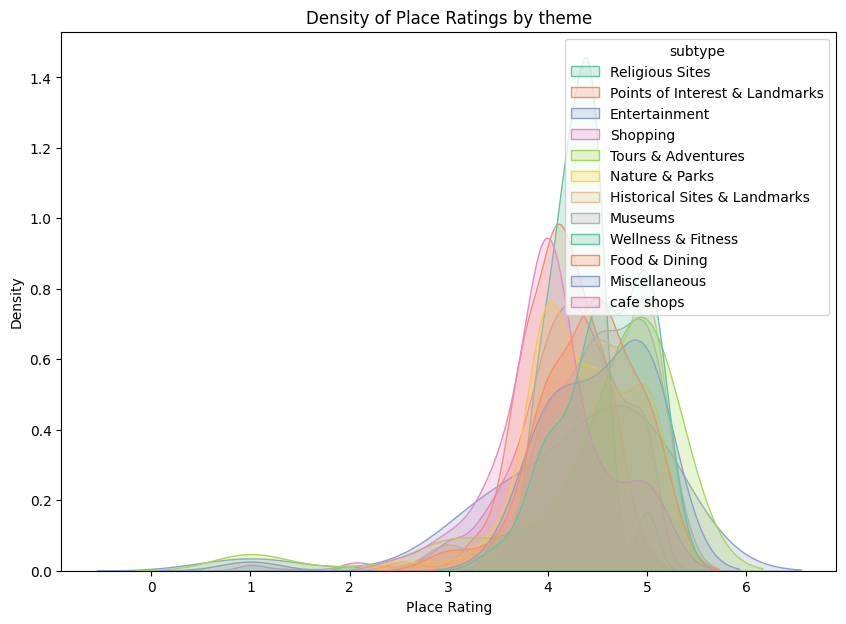

In [22]:
plt.figure(figsize=(10, 7))
# KDE plot for placeRating by subtype
sns.kdeplot(data=combined_df_Translated_NoDuplicates, x='placeRating', hue='subtype', fill=True, common_norm=False, palette='Set2')

# Add title and labels
plt.title('Density of Place Ratings by theme')
plt.xlabel('Place Rating')
plt.ylabel('Density')

# Show the plot
plt.show()

##2nd visulization Distribution of Text Sentiment by Themes

The bar chart depicts the distribution of text sentiment by themes, showing that "Food & Dining" and "Wellness& Fitness" has the highest count of positive sentiments.
This indicates a strong positive perception in this
category compared to others, which may inform
marketing and service improvement strategies.

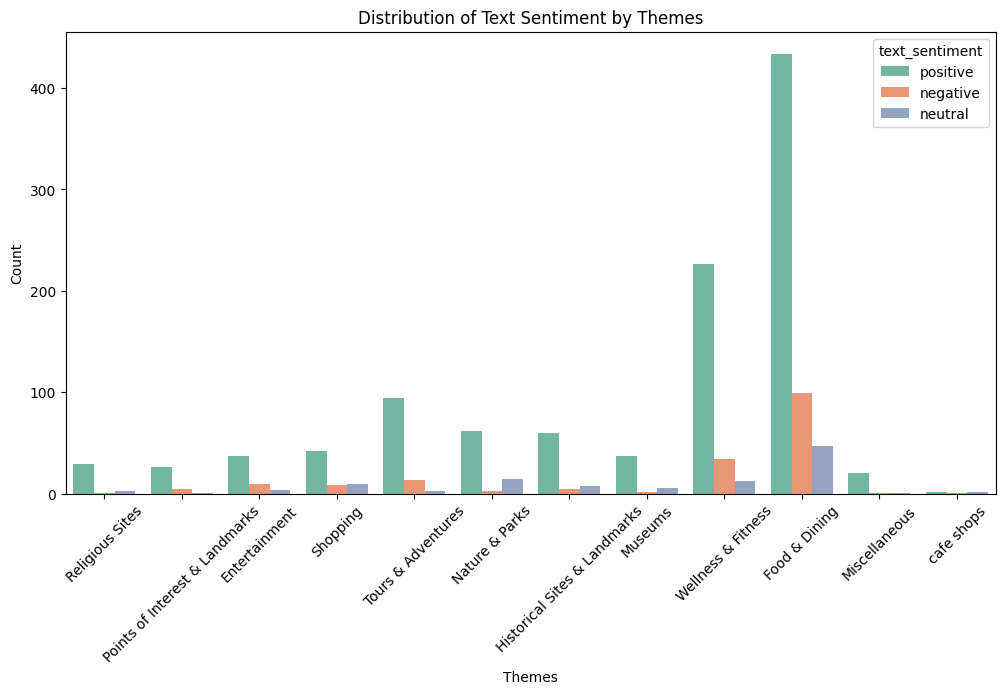

In [23]:
plt.figure(figsize=(12, 6))

# Create the countplot to show sentiment distribution by subtype
sns.countplot(x='subtype', hue='text_sentiment', data=combined_df_Translated_NoDuplicates, palette='Set2')

# Add a title and labels
plt.title('Distribution of Text Sentiment by Themes')
plt.xlabel('Themes')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

## 3rd visulization KDE Plot for Sentiment Distribution by Rating

The circular chart illustrates sentiment distribution,
revealing that 78.6% of sentiments are positive,
while only 13.4% are negative. This indicates a
predominantly favorable perception overall, suggesting a strong customer satisfaction level.



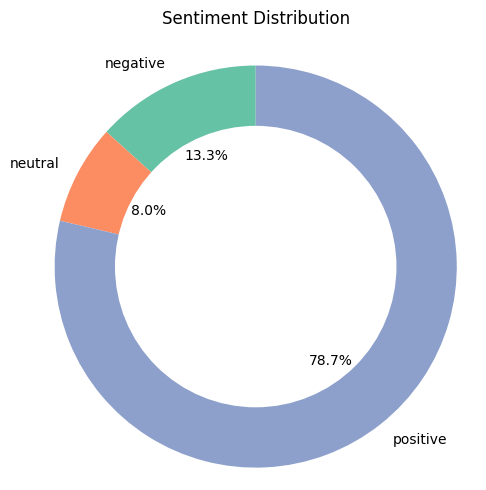

In [24]:
sentiment_counts = combined_df_Translated_NoDuplicates.groupby('text_sentiment').size().reset_index(name='count')

# Create a donut chart
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts['count'], labels=sentiment_counts['text_sentiment'], autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette('Set2', len(sentiment_counts)))

# Create a white circle in the center of the pie chart to make it a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Sentiment Distribution\n')
plt.axis('equal')
plt.tight_layout()

plt.show()

## 4th visulization Geographical Distribution of Places

The scatter plot showcases the geographical distribution of various attractions in Saudi Arabia, highlighting clusters around major cities such as Jeddah,
Riyadh, and Dammam. Each color represents different themes, including Points of Interest & Landmarks, Religious Sites. This
visualization serves as a valuable tool for identifying popular areas for different attractions, offering
insights that can inform tourism and urban development strategies in these cities.

Original dataset size: 3416
Filtered dataset size (valid coordinates): 3413


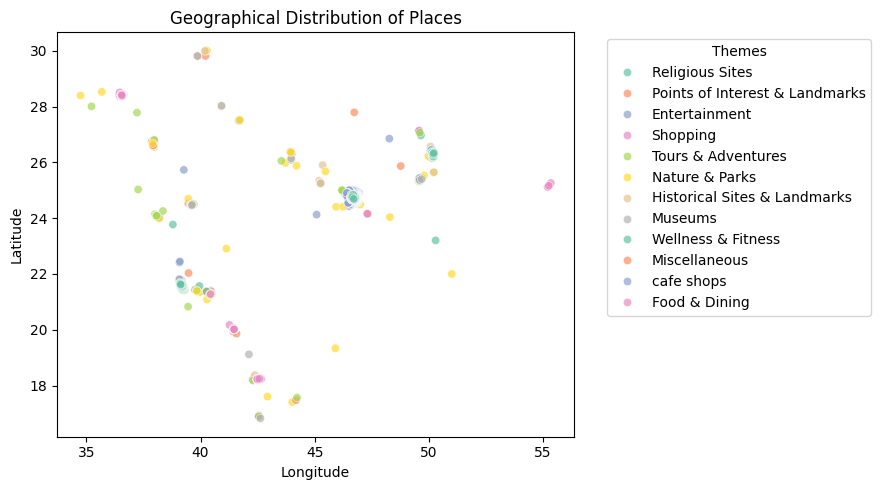

In [25]:
# Convert longitude and latitude columns to numeric, forcing errors to NaN
combined_df_Translated_NoDuplicates['longitude'] = pd.to_numeric(combined_df_Translated_NoDuplicates['longitude'], errors='coerce')
combined_df_Translated_NoDuplicates['latitude'] = pd.to_numeric(combined_df_Translated_NoDuplicates['latitude'], errors='coerce')

# Filter out rows with missing or unrealistic longitude and latitude values
filtered_data = combined_df_Translated_NoDuplicates.dropna(subset=['longitude', 'latitude'])
filtered_data = filtered_data[
    (filtered_data['longitude'].between(-180, 180)) &
    (filtered_data['latitude'].between(-90, 90))
]

# Check the size of the filtered dataset
print(f"Original dataset size: {len(combined_df_Translated_NoDuplicates)}")
print(f"Filtered dataset size (valid coordinates): {len(filtered_data)}")

plt.figure(figsize=(9, 5))
sns.scatterplot(
    data=filtered_data,
    x='longitude',
    y='latitude',
    hue='subtype',
    palette='Set2',
    alpha=0.7
)

plt.title('Geographical Distribution of Places')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Themes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 5th. Distribution of the number of reviews across different themes

The chart visualizes the distribution of the number of reviews across different Themes. It shows that **Food & Dining** and **Wellness & Fitness** have the highest number of reviews, with the majority of reviews in the **Food & Dining** category. Other subtypes, such as **Religious Sites**, **Points of Interest & Landmarks**, and **Entertainment**, also have significant numbers of reviews, though they are comparatively lower. The **Cafe Shops** category has the fewest reviews, with a noticeable gap in the data compared to other subtypes. This chart provides insights into which categories attract more reviews and indicate higher engagement from visitors.

<ipython-input-27-c127a2df8373>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='numberOfReviews', y='subtype', data=combined_df_Translated_NoDuplicates, palette='viridis')


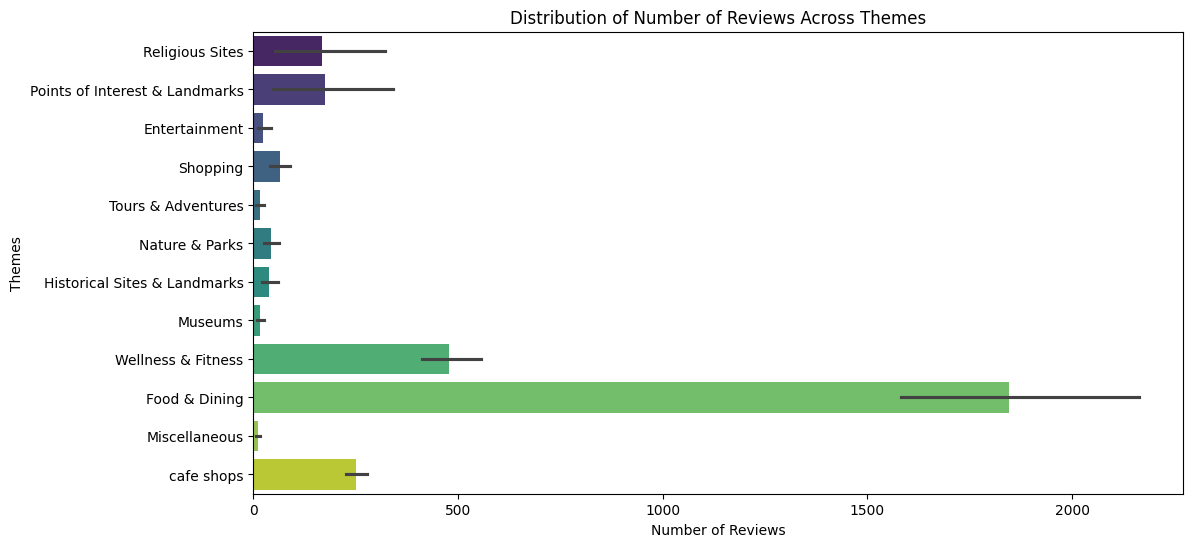

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='numberOfReviews', y='subtype', data=combined_df_Translated_NoDuplicates, palette='viridis')
plt.title('Distribution of Number of Reviews Across Themes')
plt.xlabel('Number of Reviews')
plt.ylabel('Themes')
plt.show()

# Model

This is a simple model that uses **TF-IDF vectorization** and **cosine similarity** to recommend similar tourist destinations based on the provided destination name.
The process involves the following steps:

1. **Pre-processing**: The dataset is checked for required columns, including destination name, subtype, and rating. Missing values in the 'subtype' column are handled by filling them with empty strings.
  
2. **TF-IDF Vectorization**: The 'subtype' column is transformed into a numerical representation using TF-IDF vectorization, which captures the importance of words within each destination's subtype description.

3. **Cosine Similarity**: The cosine similarity is computed between all the subtypes in the dataset, allowing for the identification of destinations with similar characteristics.

4. **Recommendation Function**: The function `recommend()` takes a destination as input, checks its existence in the dataset, computes similarity scores, and returns the top N similar destinations (excluding the input destination). It outputs relevant details like destination name, subtype, rating, and web URL.

This model can be used to develop recommendation systems that suggest similar destinations based on their characteristics and user preferences, which can be applied in tourism-related applications.


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [29]:
# Ensure the required columns exist
required_columns = ['name', 'theme', 'placeRating']
if not all(col in combined_df_Translated_NoDuplicates.columns for col in required_columns):
    raise ValueError(f"The dataset must contain the following columns: {required_columns}")

# Step 2: Apply TF-IDF Vectorization on the 'theme' column
tfidf_vectorizer = TfidfVectorizer()
combined_df_Translated_NoDuplicates['theme'] = combined_df_Translated_NoDuplicates['theme'].fillna('')  # Handle missing subtypes
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_df_Translated_NoDuplicates['theme'])

# Step 3: Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Recommendation function
def recommend(destination, cosine_sim_cosine_sim, combined_df_Translated_NoDuplicates, top_n=5):
    # Check if the destination exists in the dataset
    if destination not in combined_df_Translated_NoDuplicates['name'].values:
        return f"Destination '{destination}' not found in the dataset."

    # Get the index of the destination
    idx = combined_df_Translated_NoDuplicates[combined_df_Translated_NoDuplicates['name'] == destination].index[0]

    # Get pairwise similarity scores for all destinations
    sim_scores = list(enumerate(cosine_sim_cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)  # Sort by similarity score

    # Get the indices of the top N similar destinations (excluding the input)
    sim_indices = [i[0] for i in sim_scores[1:top_n+1]]

    # Return the recommended destinations
    return combined_df_Translated_NoDuplicates.iloc[sim_indices][['name', 'theme', 'placeRating', 'webUrl']]

# Test the recommendation function
input_destination = 'Half Moon Beach'
recommendations = recommend(input_destination, cosine_sim, combined_df_Translated_NoDuplicates)

# Print recommendations
print(f"Recommendations for '{input_destination}':")
print(recommendations)


Recommendations for 'Half Moon Beach':
                        name    theme  placeRating  \
64          Al Nakheel Beach  Beaches          4.0   
72       Yanbu Al-Bahr Beach  Beaches          4.0   
118              Uqair Beach  Beaches          4.0   
225  Eastern Dates Al Khobar  Beaches          4.0   
482            Al Saif Baech  Beaches          4.0   

                                                webUrl  
64   https://www.tripadvisor.com/Attraction_Review-...  
72   https://www.tripadvisor.com/Attraction_Review-...  
118  https://www.tripadvisor.com/Attraction_Review-...  
225  https://www.tripadvisor.com/Attraction_Review-...  
482  https://www.tripadvisor.com/Attraction_Review-...  
